In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pylab import rcParams
from scipy.optimize import curve_fit
rcParams['figure.figsize'] = 8, 6

In [3]:
X = np.array([[0, 1],[1, 0]])
Y = np.array([[0, -1j],[1j, 0]])
Z = np.array([[1, 0],[0, -1]])

In [4]:
g = 0.416

In [5]:
hs1 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_h_s1.txt', sep = '\t', decimal=',', skiprows=0)
hs2 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_h_s2.txt', sep = '\t', decimal=',', skiprows=0)
hs3 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_h_s3.txt', sep = '\t', decimal=',', skiprows=0)
rs1 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_r_s1.txt', sep = '\t', decimal=',', skiprows=0)
rs2 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_r_s2.txt', sep = '\t', decimal=',', skiprows=0)
rs3 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_r_s3.txt', sep = '\t', decimal=',', skiprows=0)
us1 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_u_s1.txt', sep = '\t', decimal=',', skiprows=0)
us2 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_u_s2.txt', sep = '\t', decimal=',', skiprows=0)
us3 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_u_s3.txt', sep = '\t', decimal=',', skiprows=0)
ds1 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_d_s1.txt', sep = '\t', decimal=',', skiprows=0)
ds2 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_d_s2.txt', sep = '\t', decimal=',', skiprows=0)
ds3 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex2_d_s3.txt', sep = '\t', decimal=',', skiprows=0)
ms1 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex3_s1.txt', sep = '\t', decimal=',', skiprows=0)
ms2 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex3_s2.txt', sep = '\t', decimal=',', skiprows=0)
ms3 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\ex3_s3.txt', sep = '\t', decimal=',', skiprows=0)

uus1 = pd.read_csv(r'C:\Users\Ivan\Desktop\квантэл\прак\томография кубита\IvanandNik\s1long.txt', sep = '\t', decimal=',', skiprows=0)

In [219]:
s = [-0.251, 0.650, -0.797]
ds =[0.004, 0.007, 0.010]
rs3

Time  HWP_a1   QWP_a1  HWP_a2   QWP_a2  Single Count 1  Single Count 2  \
0  4780.057 -0.0002 -44.9998  0.0001  44.9998           599.0         23798.0   
1  4788.352 -0.0002 -44.9998  0.0001  44.9998           585.0         24375.0   
2  4796.418 -0.0002 -44.9998  0.0001  44.9998           598.0         23951.0   

   Single Count 3  Single Count 4      Sum  Coincidence Count 1  \
0           363.0         19630.0  44390.0                  6.0   
1           385.0         20163.0  45508.0                  6.0   
2           374.0         19974.0  44897.0                  5.0   

   Coincidence Count 2  Coincidence Count 3  Coincidence Count 4  \
0                  1.0                  1.0                992.0   
1                  1.0                  2.0                991.0   
2                  0.0                  1.0                994.0   

   Coincidence Sum  
0           1000.0  
1           1000.0  
2           1000.0

In [220]:
def rho(s1, s2, s3):
    return 1/2*np.array([[1+s1, s2-1j*s3], [s2+1j*s3, 1-s1]])
def F(r0, r):
    return (np.trace(la.sqrtm(la.sqrtm(r0)@r@la.sqrtm(r0))))**2
def S(H):
    return ((H['Coincidence Count 1'] + H['Coincidence Count 2'] - g*H['Coincidence Count 3'] - g*H['Coincidence Count 4'])/\
            (H['Coincidence Count 1'] + H['Coincidence Count 2'] + g*H['Coincidence Count 3'] + g*H['Coincidence Count 4'])).mean(),\
            ((H['Coincidence Count 1'] + H['Coincidence Count 2'] - g*H['Coincidence Count 3'] - g*H['Coincidence Count 4'])/\
            (H['Coincidence Count 1'] + H['Coincidence Count 2'] + g*H['Coincidence Count 3'] + g*H['Coincidence Count 4'])).std()/H.shape[0]**0.5

In [221]:
S(hs3)

(0.14847479238850012, 0.037510588382798936)

In [222]:
s_norm = np.array(s)/(s[0]**2+s[1]**2+s[2]**2)**0.5
s_norm

array([-0.23709757,  0.61399768, -0.75285562])

In [223]:
r0 = 1/8*np.array([[3, 3**0.5*(1+2j)],
               [3**0.5*(1-2j), 5]])
r = rho(s_norm[0], s_norm[1], s_norm[2])
#r = rho(s[0], s[1], s[2])
r

array([[0.38145122+0.j        , 0.30699884+0.37642781j],
       [0.30699884-0.37642781j, 0.61854878+0.j        ]])

In [224]:
(la.eig(r))[0]

array([-3.42846513e-17-2.69641488e-17j,  1.00000000e+00+2.69641488e-17j])

In [226]:
vec = (la.eig(r))[1][:, 0]
vec

array([ 0.78647872+0.j        , -0.39034602+0.47862428j])

In [227]:
v = np.array([vec[0]*vec[0].conj(), vec[1]*vec[0].conj()])
v /= (abs(v[0])**2+abs(v[1])**2)**0.5
v

array([ 0.78647872+0.j        , -0.39034602+0.47862428j])

In [228]:
RR

array([[0.40424444+2.77555756e-17j, 0.16585349+3.31706974e-01j],
       [0.16585349-3.31706974e-01j, 0.59575556+2.77555756e-17j]])

In [205]:
(-0.048+0.076j)*(-0.048-0.076j)

(0.00808+0j)

In [229]:
(la.eig(r))[0]

array([-3.42846513e-17-2.69641488e-17j,  1.00000000e+00+2.69641488e-17j])

In [230]:
(la.eig(RR))[0]

array([0.11697778+5.23215712e-18j, 0.88302222+1.33545721e-16j])

In [231]:
np.trace(r@r), ((s[0]*ds[0])**2+(s[1]*ds[1])**2+(s[2]*ds[2])**2)**0.5

((0.9999999999999999+0j), 0.009232086221434462)

In [232]:
(np.trace(la.sqrtm(la.sqrtm(r0)@r@la.sqrtm(r0))))**2

(0.9885676465753601+1.707529334596904e-08j)

In [233]:
1/2**0.5

0.7071067811865475

In [234]:
((s[0])**2+(s[1])**2+(s[2])**2)**0.5

1.0586359147506759

In [235]:
np.trace(Z@RR), np.trace(X@RR), np.trace(Y@RR)

((-0.19151111077974414+0j),
 (0.331706974084469+5.551115123125783e-17j),
 (-0.6634139481689385+0j))

In [236]:
def WP(phi, delta):
    return np.array(\
    [[np.cos(phi)**2+np.exp(1j*delta)*np.sin(phi)**2, (1-np.exp(1j*delta))*np.cos(phi)*np.sin(phi)],\
     [(1-np.exp(1j*delta))*np.cos(phi)*np.sin(phi), np.sin(phi)**2+np.exp(1j*delta)*np.cos(phi)**2]])

In [237]:
J0 = np.array([[1] , [0]])
R0 = np.array([[0.25 , 0],
              [0, 0.75 ]])

In [238]:
J = (abs(WP(np.pi/18, np.pi)@J0))**2
J

array([[0.88302222],
       [0.11697778]])

In [39]:
a = np.array([[1, 1j],[2, 2j]])

In [40]:
R0 = np.array([[J[1] , 0],
              [0, J[0] ]], dtype='complex')

In [41]:
RR = WP(np.pi/3, np.pi)@WP(np.pi/3, np.pi/2)@R0@WP(np.pi/3, np.pi).conj().transpose()@WP(np.pi/3, np.pi/2).conj().transpose()

In [42]:
RR

array([[0.40424444+2.77555756e-17j, 0.16585349+3.31706974e-01j],
       [0.16585349-3.31706974e-01j, 0.59575556+2.77555756e-17j]])

In [43]:
uus1.insert(4, "S", ((uus1['Coincidence Count 1'] + uus1['Coincidence Count 2'] - g*uus1['Coincidence Count 3'] - g*uus1['Coincidence Count 4'])/\
            (uus1['Coincidence Count 1'] + uus1['Coincidence Count 2'] + g*uus1['Coincidence Count 3'] + g*uus1['Coincidence Count 4']))) 
uus1

Coincidence Count 1  Coincidence Count 2  Coincidence Count 3  \
0                    0.0                196.0                  6.0   
1                    0.0                204.0                  5.0   
2                    0.0                198.0                  6.0   
3                    0.0                196.0                  6.0   
4                    0.0                204.0                  5.0   
..                   ...                  ...                  ...   
295                  0.0                196.0                  6.0   
296                  0.0                204.0                  5.0   
297                  0.0                198.0                  6.0   
298                  0.0                204.0                  5.0   
299                  0.0                204.0                  5.0   

     Coincidence Count 4         S  
0                  798.0 -0.261024  
1                  791.0 -0.237577  
2                  796.0 -0.255124  
3                  798.0 -0.261024  
4                  791.0 -0.237577  
..                   ...       ...  
295                798.0 -0.261024  
296                791.0 -0.237577  
297                796.0 -0.255124  
298                791.0 -0.237577  
299                791.0 -0.237577  

[300 rows x 5 columns]

In [256]:
# s1 = np.array(uus1['S']) + RND1/300 
s1 = RND1 - 0.25
s2 = RND2 + 0.65
s3 = -0.797 + RND3
s0 = (s1**2+s2**2+s3**2)**0.5

In [257]:
si0.shape[0]

3

In [258]:
def s_i(X, i):
    Y = np.split(X[:X.size-X.size%i],  int(X.size/i))
    Z = np.zeros(int(X.size/i))
    for j in range(int(X.size/i)):
        Z[j] = Y[j].mean()
    return Z      


In [259]:
def Fi(i):
    si1 = s_i(s1, i)
    si2 = s_i(s2, i)
    si3 = s_i(s3, i)
    si0 = (si1**2+si2**2+si3**2)**0.5
    
    si1_n =si1 / si0
    si2_n =si2 / si0
    si3_n =si3 / si0
    
    F_m = np.zeros(si0.size)
    for j in range(0, si0.size):
        F_m[j] = F(rho(si1[j], si2[j], si3[j]), r0)
    return F_m.mean()

array([ 0.01203404, -0.00696705])

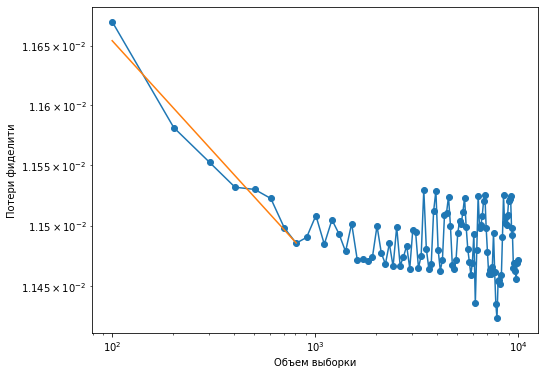

In [310]:
Fi_m = np.zeros(99)
Fi_mn = np.zeros(99)
Na = 100 * np.linspace(1, 100, 99)
for i in range(1, 100):
    si1 = s_i(s1, i)
    si2 = s_i(s2, i)
    si3 = s_i(s3, i)
    si0 = (si1**2+si2**2+si3**2)**0.5
    
    si1_n =si1 / si0
    si2_n =si2 / si0
    si3_n =si3 / si0
    
    F_m = np.zeros(si0.size)
    F_mn = np.zeros(si0.size)
    for j in range(0, si0.size):
        F_m[j] = F(rho(si1[j], si2[j], si3[j]), r0).real
        F_mn[j] = F(rho(si1_n[j], si2_n[j], si3_n[j]), r0).real
    Fi_m[i-1] = F_m.mean()
    Fi_mn[i-1] = F_mn.mean()



def y(x, A, C):
    # return np.log(A*np.log(x)+C)
    return A*x**C

p1, _ = curve_fit(y, Na[:8], 1-Fi_mn[:8])

plt.plot(Na, 1-Fi_mn, 'o-', Na[:8], y(Na[:8], *p1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Объем выборки')
plt.ylabel('Потери фиделити')
p1

array([ 1.68992482e-02, -3.63063402e-08])

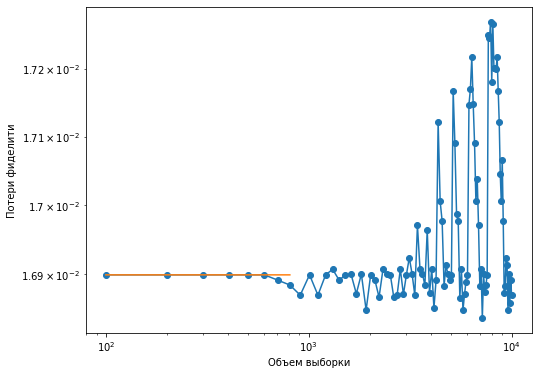

In [311]:
p2, _ = curve_fit(y, Na[:6], Fi_m[:6]-1)

plt.plot(Na, Fi_m-1, 'o-', Na[:8], y(Na[:8], *p2))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Объем выборки')
plt.ylabel('Потери фиделити')
p2

In [50]:
a = np.array([1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6])
N =10
b = np.split(a[:a.size-a.size%N],  int(a.size/N))
b

[array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4])]

In [51]:
7-7%2

6

In [255]:
RND1 = np.zeros(300)
for i in range(0, 300):
    RND1[i] = np.random.normal()/50
RND2 = np.zeros(300)
for i in range(0, 300):
    RND2[i] = np.random.normal()/40
RND3 = np.zeros(300)
for i in range(0, 300):
    RND3[i] = np.random.normal()/54

In [240]:
np.random.random()

0.8805370082484014

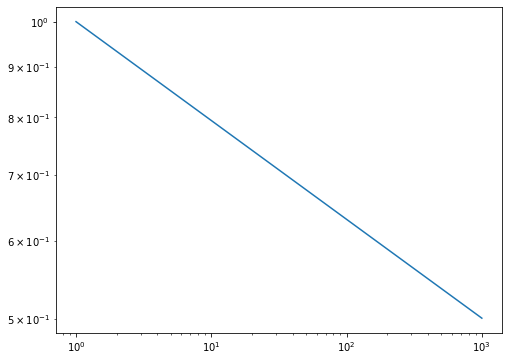

In [304]:
xxx = np.linspace(1, 1000, 10000)
plt.plot(xxx, xxx**(-0.1))
plt.xscale('log')
plt.yscale('log')